In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import cv2
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
df_data_img = pd.read_csv("../Modelo_train/list_attr_celeba.csv")


In [4]:
df_data_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [5]:
df_data_img[df_data_img == -1] 

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,NaN,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,-1.0,NaN
1,NaN,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,NaN,-1.0,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,...,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3,NaN,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,-1.0,NaN
4,NaN,-1.0,NaN,NaN,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,NaN,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,NaN
202595,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,-1.0,-1.0,...,-1.0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
202596,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,...,-1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
202597,NaN,-1.0,NaN,NaN,-1.0,-1.0,-1.0,NaN,-1.0,NaN,...,-1.0,NaN,-1.0,NaN,NaN,-1.0,NaN,-1.0,-1.0,NaN


In [6]:
df_data_img.replace(-1, 0, inplace=True)

In [7]:
df_data_img

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
202595,202596.jpg,0,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,0,1
202596,202597.jpg,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
202597,202598.jpg,0,1,1,0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1


In [8]:
df_data_img_corto = df_data_img[["image_id","Male"]]

In [9]:
df_data_img_corto

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0
...,...,...
202594,202595.jpg,0
202595,202596.jpg,1
202596,202597.jpg,1
202597,202598.jpg,0


In [10]:
df_data_img_corto["image_id"] = df_data_img_corto["image_id"].str.replace(".jpg","")

C:\Users\Tiago\AppData\Local\Temp\ipykernel_17140\3906306353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_img_corto["image_id"] = df_data_img_corto["image_id"].str.replace(".jpg","")


In [11]:
df_data_img_corto

,image_id,Male
0,000001,0
1,000002,0
2,000003,1
3,000004,0
4,000005,0
...,...,...
202594,202595,0
202595,202596,1
202596,202597,1
202597,202598,0


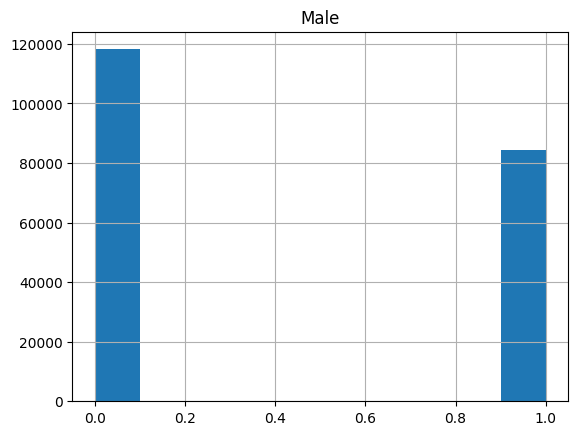

In [12]:
df_data_img_corto.hist();

In [13]:
train = df_data_img_corto[:180000]
test = df_data_img_corto[180000:]

In [14]:
train.tail()

,image_id,Male
179995,179996,1
179996,179997,0
179997,179998,0
179998,179999,0
179999,180000,0


In [15]:
train.tail()

,image_id,Male
179995,179996,1
179996,179997,0
179997,179998,0
179998,179999,0
179999,180000,0


In [16]:
train["Male"].value_counts()

Male
0    104387
1     75613
Name: count, dtype: int64

In [17]:
test["Male"].value_counts()

Male
0    13778
1     8821
Name: count, dtype: int64

In [18]:
ROOT_PATH = os.getcwd()

In [19]:
TRAIN_PATH = "../Modelo_train/train/"
TEST_PATH = "../Modelo_train/test/"

Nuevo aproach

In [20]:
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

In [21]:
main_dir = TRAIN_PATH

# carpetas = ["angry", "disgust", "fear", "happy", "neutral", "sad","surprise"]

# archivos  = []
# etiquetas = []

# for carpeta in carpetas:   
#     carpeta_path = os.path.join(main_dir, carpeta)   
#     archivos_carpeta = os.listdir(carpeta_path)  
#     for archivo in archivos_carpeta:       
#         nombre_archivo = os.path.basename(archivo)
#         archivos.append(nombre_archivo)
#         etiquetas.append(carpeta)

# df = pd.DataFrame({'archivos': archivos, 'etiquetas': etiquetas})

In [22]:
train

,image_id,Male
0,000001,0
1,000002,0
2,000003,1
3,000004,0
4,000005,0
...,...,...
179995,179996,1
179996,179997,0
179997,179998,0
179998,179999,0


(218, 178, 3)
255


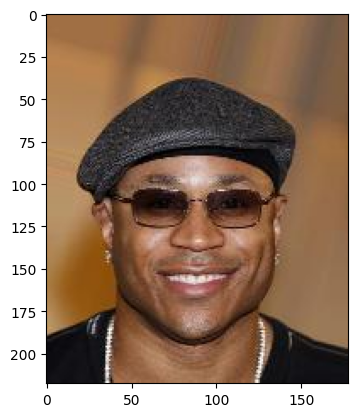

In [23]:
archivos_carpeta = os.listdir(main_dir)

imagen_aleatoria = random.choice(archivos_carpeta)
imagen_path = os.path.join(main_dir,imagen_aleatoria)

image = imread(imagen_path)

print(image.shape)
print(np.max(image))
plt.imshow(image)
plt.show()

In [24]:
# IMAGE_SIZE = (32,32)
IMAGE_SIZE = (64,64)


redimensionado

In [25]:
X = []
y = []

for _, row in train.iterrows():
    image_path = os.path.join(TRAIN_PATH, row['image_id'] + ".jpg",)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        continue
    
    image = cv2.resize(image, (32, 32))  # Ajusta el tamaño de las imágenes según sea necesario
    X.append(image)
    y.append(row['Male'])

# Convertir las listas en arrays numpy
X = np.array(X)
y = np.array(y)

KeyboardInterrupt: 

In [26]:
X

array([[[[194, 231, 253],
         [194, 231, 253],
         [194, 231, 253],
         ...,
         [ 20,  63, 109],
         [ 75, 110, 148],
         [220, 234, 252]],

        [[194, 231, 253],
         [194, 231, 253],
         [194, 231, 253],
         ...,
         [ 31,  49, 100],
         [122, 165, 198],
         [224, 241, 250]],

        [[198, 235, 255],
         [197, 234, 255],
         [196, 233, 255],
         ...,
         [ 35,  70, 119],
         [177, 213, 232],
         [222, 234, 247]],

        ...,

        [[ 84, 131, 200],
         [ 95, 139, 200],
         [ 29,  54, 108],
         ...,
         [ 76,  97, 154],
         [120, 153, 203],
         [140, 174, 224]],

        [[ 94, 136, 206],
         [ 31,  63, 125],
         [ 15,  19,  74],
         ...,
         [ 23,  39, 100],
         [ 69,  83, 136],
         [106, 118, 172]],

        [[ 19,  63, 131],
         [ 33,  60, 128],
         [  6,  19,  75],
         ...,
         [ 20,  48, 119],
        

In [27]:
nombre_archivo = "X.txt"

# Guarda el array en un archivo de texto
np.savetxt(nombre_archivo, X.flatten(), fmt='%d')


In [28]:
nombre_archivo = "y.txt"

# Guarda el array en un archivo de texto
np.savetxt(nombre_archivo, y.flatten(), fmt='%d')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Crear un generador de aumento de datos
# datagen = ImageDataGenerator(
#     rotation_range=20,              # Rango de rotación aleatoria
#     width_shift_range=0.1,          # Rango de cambio horizontal aleatorio
#     height_shift_range=0.1,         # Rango de cambio vertical aleatorio
#     shear_range=0.2,                # Rango de distorsión de corte
#     zoom_range=0.2,                 # Rango de zoom aleatorio
#     horizontal_flip=True,           # Inversión horizontal aleatoria
#     vertical_flip=True,             # Inversión vertical aleatoria
#     fill_mode='nearest'             # Modo de relleno de píxeles
# )

# # Ajustar el generador de aumento de datos en los datos de entrenamiento
# datagen.fit(X_train)

# # Crear el modelo
# model = keras.Sequential([
#     # ... capas de tu modelo ...
# ])

# # Compilar el modelo
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Entrenar el modelo utilizando el generador de aumento de datos
# model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10)

In [30]:
print(X_train.shape)
print(X_test.shape)

(144000, 32, 32, 3)
(36000, 32, 32, 3)


In [31]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


In [21]:
# shuffle
# X_train, y_train = shuffle(X_train, y_train, random_state=10)
# X_test, y_test = shuffle(X_test, y_test, random_state=10)

con optimizador adam learning rate

Modelo Básico

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Modelo Tunning

In [60]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.25))

# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(7, activation='softmax'))

# # Compilar el modelo
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [35]:
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Resto del código del modelo y entrenamiento
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4500/4500 [==============================] - 55s 12ms/step - loss: 0.1083 - accuracy: 0.4217 - val_loss: 0.1074 - val_accuracy: 0.4136
Epoch 2/10
4500/4500 [==============================] - 52s 11ms/step - loss: 0.0994 - accuracy: 0.4217 - val_loss: 0.1125 - val_accuracy: 0.4136
Epoch 3/10
4500/4500 [==============================] - 52s 11ms/step - loss: 0.0911 - accuracy: 0.4217 - val_loss: 0.0987 - val_accuracy: 0.4136
Epoch 4/10
4500/4500 [==============================] - 50s 11ms/step - loss: 0.0853 - accuracy: 0.4217 - val_loss: 0.1009 - val_accuracy: 0.4136
Epoch 5/10
 410/4500 [=>............................] - ETA: 41s - loss: 0.0723 - accuracy: 0.4245

Modelo regularización

In [45]:
# from tensorflow.keras import regularizers

# # Ajustar el tamaño de las imágenes a 32x32
# X_train_resized = np.array([cv2.resize(image, (32, 32)) for image in X_train])
# X_test_resized = np.array([cv2.resize(image, (32, 32)) for image in X_test])

# # Asegurarse de que las etiquetas estén codificadas correctamente
# y_train_encoded = label_encoder.transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)
# y_train_onehot = to_categorical(y_train_encoded)
# y_test_onehot = to_categorical(y_test_encoded)

# # Resto del código del modelo y entrenamiento
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# # Agrega más capas convolucionales con regularización L1 y L2 según sea necesario
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
# # Agrega más capas densas con regularización L1 y L2 según sea necesario
# model.add(layers.Dense(7, activation='softmax'))

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train_resized, y_train_onehot, epochs=20, validation_data=(X_test_resized, y_test_onehot))

Epoch 1/20
721/721 [==============================] - 6s 8ms/step - loss: 3.5985 - accuracy: 0.2419 - val_loss: 2.3533 - val_accuracy: 0.2614
Epoch 2/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3437 - accuracy: 0.2454 - val_loss: 2.3357 - val_accuracy: 0.2614
Epoch 3/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3408 - accuracy: 0.2454 - val_loss: 2.3423 - val_accuracy: 0.2614
Epoch 4/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3496 - accuracy: 0.2454 - val_loss: 2.3433 - val_accuracy: 0.2614
Epoch 5/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3493 - accuracy: 0.2454 - val_loss: 2.3406 - val_accuracy: 0.2614
Epoch 6/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3470 - accuracy: 0.2454 - val_loss: 2.3435 - val_accuracy: 0.2614
Epoch 7/20
721/721 [==============================] - 6s 8ms/step - loss: 2.3480 - accuracy: 0.2454 - val_loss: 2.3436 - val_accuracy: 0.2614
Epoch 

Predictions

In [24]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Obtener la etiqueta predicha para cada imagen
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Comparar las etiquetas predichas con las etiquetas reales
for i in range(len(X_test)):
    print("Imagen:", i)
    print("Etiqueta real:", y_test[i])
    print("Etiqueta predicha:", predicted_labels[i])
    print()

181/181 [==============================] - 1s 7ms/step
Imagen: 0
Etiqueta real: sad
Etiqueta predicha: sad

Imagen: 1
Etiqueta real: sad
Etiqueta predicha: neutral

Imagen: 2
Etiqueta real: surprise
Etiqueta predicha: surprise

Imagen: 3
Etiqueta real: happy
Etiqueta predicha: happy

Imagen: 4
Etiqueta real: angry
Etiqueta predicha: angry

Imagen: 5
Etiqueta real: sad
Etiqueta predicha: angry

Imagen: 6
Etiqueta real: neutral
Etiqueta predicha: surprise

Imagen: 7
Etiqueta real: happy
Etiqueta predicha: happy

Imagen: 8
Etiqueta real: happy
Etiqueta predicha: angry

Imagen: 9
Etiqueta real: surprise
Etiqueta predicha: sad

Imagen: 10
Etiqueta real: angry
Etiqueta predicha: sad

Imagen: 11
Etiqueta real: surprise
Etiqueta predicha: surprise

Imagen: 12
Etiqueta real: surprise
Etiqueta predicha: surprise

Imagen: 13
Etiqueta real: disgust
Etiqueta predicha: angry

Imagen: 14
Etiqueta real: surprise
Etiqueta predicha: happy

Imagen: 15
Etiqueta real: angry
Etiqueta predicha: neutral

Imag

In [25]:
predictions

array([[8.0112949e-02, 3.6776174e-04, 2.8982524e-02, ..., 1.4493755e-01,
        7.0944339e-01, 2.0249745e-04],
       [4.2106301e-02, 7.3080875e-05, 1.4158557e-01, ..., 4.5211810e-01,
        3.0476347e-01, 9.5496296e-05],
       [3.1182203e-03, 1.7200474e-04, 6.0313161e-02, ..., 5.7193631e-04,
        6.1726669e-04, 9.3272334e-01],
       ...,
       [3.6081424e-01, 6.2365241e-02, 6.2988013e-02, ..., 1.1527184e-01,
        2.5865498e-01, 1.2890984e-01],
       [3.3828649e-03, 5.3145597e-04, 3.9963834e-03, ..., 7.3783047e-02,
        2.0233016e-03, 5.9086606e-03],
       [7.3871179e-03, 5.7432451e-04, 2.2506137e-01, ..., 7.9306178e-02,
        1.4256715e-02, 5.9752977e-01]], dtype=float32)

Subida a kaggle

In [38]:
# Listas para almacenar las imágenes y sus IDs
X_test = []
test_ids = []

# Recorrer las imágenes en la carpeta de prueba
for file_name in os.listdir(TEST_PATH):
    image_path = os.path.join(TEST_PATH, file_name)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        continue
    
    image = cv2.resize(image, (32, 32))  # Ajusta el tamaño de las imágenes según sea necesario
    X_test.append(image)
    test_ids.append(file_name)

# Convertir las listas en arrays numpy
X_test = np.array(X_test)

# Preprocesar las imágenes de prueba
X_test = X_test / 255.0  # Normalizar los valores de píxeles, si es necesario

Error al cargar la imagen: ../../data/images/test/angry
Error al cargar la imagen: ../../data/images/test/disgust
Error al cargar la imagen: ../../data/images/test/fear
Error al cargar la imagen: ../../data/images/test/happy
Error al cargar la imagen: ../../data/images/test/neutral
Error al cargar la imagen: ../../data/images/test/sad
Error al cargar la imagen: ../../data/images/test/surprise


In [39]:
# Hacer predicciones en las imágenes de prueba
predictions = model.predict(X_test)
# Obtener la etiqueta predicha para cada imagen
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Crear un DataFrame con las predicciones y los IDs
submission = pd.DataFrame({'id_img': test_ids, 'label': predicted_labels})

# Guardar el DataFrame en un archivo CSV
submission.to_csv('submission.csv', index=False)

# Quitar la extensión ".jpg" de los nombres de archivo
submission['id_img'] = submission['id_img'].str.replace('.jpg', '')

# Guardar el DataFrame en un archivo CSV
submission.to_csv('submission.csv', index=False)

221/221 [==============================] - 2s 7ms/step


In [40]:
df_sub = pd.read_csv('submission.csv')

In [41]:
df_sub.shape

(7066, 2)

In [55]:
submission['id_img'] = submission['id_img'].str.replace('.jpg', '')

C:\Users\usuario\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


C:\Users\usuario\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
